Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

# Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
df["Age"].isnull().sum()

177

In [28]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [32]:
df["Cabin"].isnull().mean()

0.7710437710437711

In [33]:
df["Cabin_Median"] = np.where(df["Cabin"].isnull(),1,0)

In [34]:
df["Cabin_Median"].mean()

0.7710437710437711

In [36]:
df.groupby(['Survived'])["Cabin_Median"].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Median, dtype: float64

# Missing At Random(MAR)

Men---hide their salary
Women---hide their age


# Techniques for Handling Missing Values

1. Mean/ Median/Mode replacement
2. Random Sampling Imputation
3. Capturing Nan Values with a New Features
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# Mean Meadian Mode Imputation
When we apply?
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [39]:
df = pd.read_csv('titanic.csv',usecols = ["Fare","Age","Survived"])

In [40]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [43]:
def median_replace(df,Variable,Median):
    df[Variable+"_Median"] = df[Variable].fillna(Median)
    

In [48]:
Median = df["Age"].median()

In [52]:
 median_replace(df,"Age",Median)

In [55]:
Median

28.0

In [59]:
df.head()

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [57]:
print(df["Age"].std())

14.526497332334044


In [60]:
print(df["Age_Median"].std())

13.019696550973194


In [61]:
import matplotlib.pyplot as plt

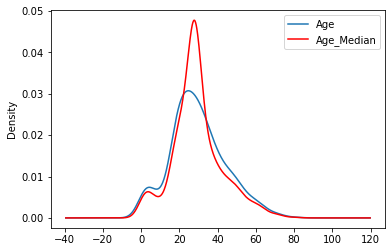

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
df["Age"].plot(kind = 'kde',ax = ax)
df.Age_Median.plot(kind = 'kde',ax = ax,color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')